# House Price Prediction — EDA & Baseline Models

**Author:** Shreyansh Mishra  
**College:** GLA University, Mathura  
**Date:** 2025-11-12

This notebook demonstrates EDA and baseline regression models (Linear Regression & Random Forest) on a house price dataset. Replace `house_prices_sample.csv` with your real dataset if available.

In [13]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [21]:

df_raw = pd.read_csv('house_prices_sample.csv')
df = df_raw.copy()
df.head()


,sqft,bedrooms,bathrooms,year_built,lot_size,location,price
0,1373,1,1,1959,200.7,Zone C,585182
1,1151,3,3,1960,398.3,Zone B,680808
2,1426,5,5,1970,165.2,Zone D,695633
3,1733,3,3,1994,553.9,Zone C,720995
4,1118,4,4,1956,436.4,Zone D,692481


In [22]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sqft        1200 non-null   int64  
 1   bedrooms    1200 non-null   int64  
 2   bathrooms   1200 non-null   int64  
 3   year_built  1200 non-null   int64  
 4   lot_size    1200 non-null   float64
 5   location    1200 non-null   object 
 6   price       1200 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 65.8+ KB


,sqft,bedrooms,bathrooms,year_built,lot_size,price
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03
mean,1213.375833,2.957500,2.678333,1986.175833,401.585667,7.408606e+05
std,344.659764,0.927224,0.984380,20.745286,145.438542,9.422867e+04
min,300.000000,1.000000,1.000000,1950.000000,50.000000,4.590290e+05
25%,981.000000,2.000000,2.000000,1968.000000,303.650000,6.722565e+05
50%,1216.000000,3.000000,3.000000,1987.000000,397.950000,7.363765e+05
75%,1436.250000,3.000000,3.000000,2004.000000,501.300000,8.064752e+05
max,2548.000000,5.000000,5.000000,2022.000000,1007.900000,1.083701e+06


## Data Cleaning
- Check missing values
- Encode categorical variables


In [23]:
df.isnull().sum()

sqft          0
bedrooms      0
bathrooms     0
year_built    0
lot_size      0
location      0
price         0
dtype: int64

In [24]:
df_model = df_raw.copy()
df_model['age'] = 2025 - df_model['year_built']
df_model = pd.get_dummies(df_model, columns=['location'], drop_first=True)
df_model.head()

,sqft,bedrooms,bathrooms,year_built,lot_size,price,age,location_Zone B,location_Zone C,location_Zone D
0,1373,1,1,1959,200.7,585182,66,False,True,False
1,1151,3,3,1960,398.3,680808,65,True,False,False
2,1426,5,5,1970,165.2,695633,55,False,False,True
3,1733,3,3,1994,553.9,720995,31,False,True,False
4,1118,4,4,1956,436.4,692481,69,False,False,True


## EDA Visualizations
1. Price distribution
2. Price vs sqft
3. Price by location
4. Correlation heatmap

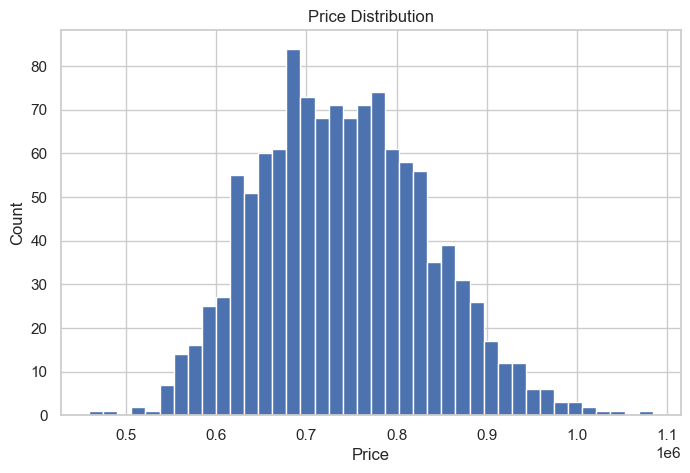

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=40)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

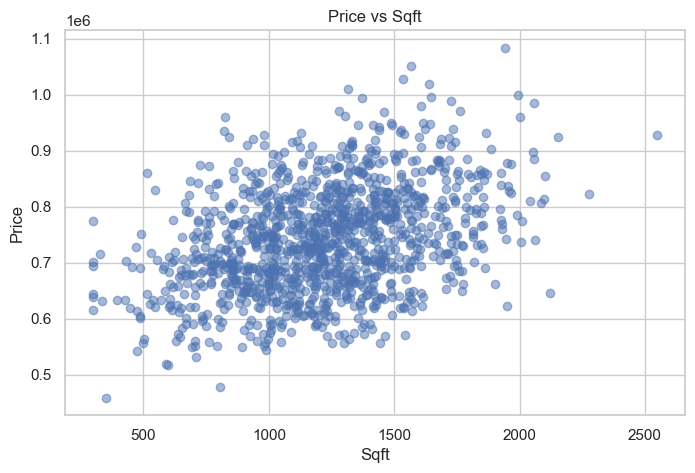

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df['sqft'], df['price'], alpha=0.5)
plt.title('Price vs Sqft')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

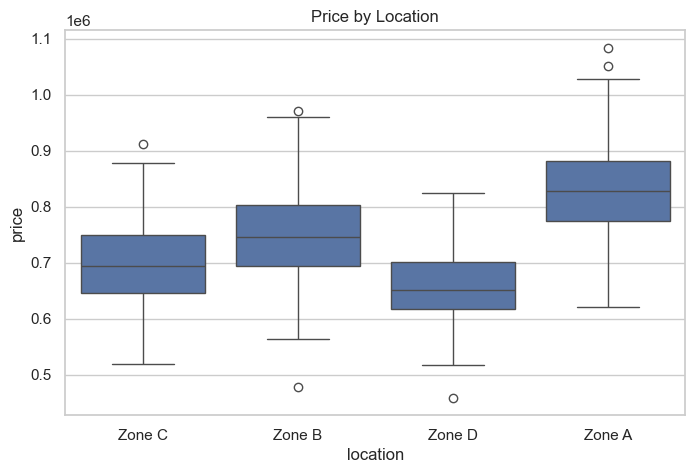

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='location', y='price', data=df_raw)
plt.title('Price by Location')
plt.show()

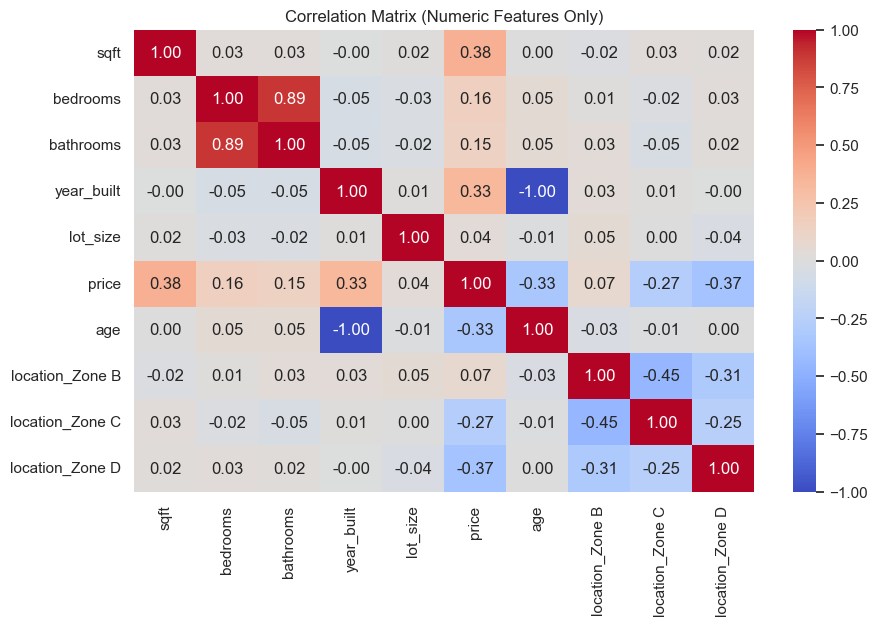

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df_model.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()


## Modeling (Baseline)
- Split data
- Linear Regression
- Random Forest Regressor
- Evaluate with RMSE and MAE

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_model.drop(columns=['price', 'year_built'])
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics
for name, ypred in [('Linear Regression', y_pred_lr), ('Random Forest', y_pred_rf)]:
    rmse = mean_squared_error(y_test, ypred, squared=False)
    mae = mean_absolute_error(y_test, ypred)
    print(name, 'RMSE:', round(rmse,2), 'MAE:', round(mae,2))

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
# Feature importance from RF
importances = rf.feature_importances_
feat_names = X.columns
imp_df = pd.Series(importances, index=feat_names).sort_values(ascending=False)
imp_df.head(10)

## Conclusion & Next Steps
- Model performance baseline shown. Future work: hyperparameter tuning, cross-validation, stacking, use real dataset, add more features (proximity to amenities, crime rate, schools).